<a href="https://colab.research.google.com/github/taskswithcode/MLIntro/blob/main/notebooks/WhatDoesGradientCapture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


- This is the notebook for the video [What does a Gradient capture? ](https://youtube.com/shorts/mPVBgwBjbTQ?si=KhPvKNZtxxdhnPSs) [ ![Watch](https://raw.githubusercontent.com/taskswithcode/image_assets/main/.github/images/Watch.svg)](https://youtube.com/shorts/mPVBgwBjbTQ?si=KhPvKNZtxxdhnPSs)

Let's say we want to algorithmically nudge a point on the curve below towards the valley. ***Gradients capture the direction of the steepest descent at a point.*** We can use this to nudge the point down the curve. This idea is utilized in training neural networks.


The image below is a plot of a function of a single variable

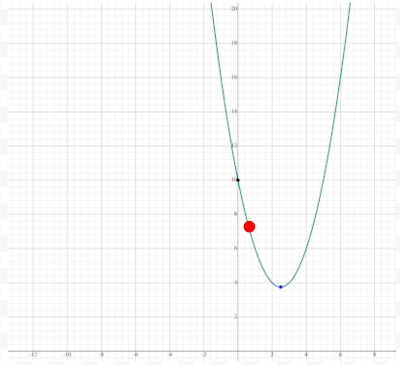

Lets first define this function

In [8]:
def function(x):
  return x**2 - 5*x + 10


Lets evaluate it a point A

In [57]:
A = .5
print(A,function(A))

0.5 7.75


Now lets compute the gradient at A

In [58]:
def compute_gradient(x,h,f):
  gradient = (f(x+h) - f(x))/h
  return gradient

h = .001
learning_rate = .05

Now lets nudge point A few times using the gradient

In [59]:
def iterative_nudge(x):
  for i in range(5):
    grad = compute_gradient(x,h,function)
    print("Gradient is:",grad)

    x = x - learning_rate*grad
    print(f"New point after {i+1} nudge(s):",x,function(x))
    print()

iterative_nudge(A)

Gradient is: -3.999000000000308
New point after 1 nudge(s): 0.6999500000000154 6.990180002499945

Gradient is: -3.599099999999744
New point after 2 nudge(s): 0.8799050000000026 6.374707809024992

Gradient is: -3.2391900000003915
New point after 3 nudge(s): 1.0418645000000222 5.876159136360185

Gradient is: -2.915270999999109
New point after 4 nudge(s): 1.1876280499999776 5.4723201351468616

Gradient is: -2.623743900000086
New point after 5 nudge(s): 1.318815244999982 5.145197425444453



Lets take another point B that is on the right hand side of the valley and apply the same procedure

In [60]:
B = 4
print(B,function(B))

4 6


In [61]:
iterative_nudge(B)

Gradient is: 3.0010000000011416
New point after 1 nudge(s): 3.849949999999943 5.572365002499845

Gradient is: 2.700900000000672
New point after 2 nudge(s): 3.7149049999999093 5.225994159024779

Gradient is: 2.4308099999998944
New point after 3 nudge(s): 3.5933644999999146 4.945445929860064

Gradient is: 2.1877289999991945
New point after 4 nudge(s): 3.483978049999955 4.718212802881714

Gradient is: 1.9689560999989197
New point after 5 nudge(s): 3.385530245000009 4.5341638148097765



Any neural net model is made up of two key functions
- a model function the converts input to an output -  the model's prediction. For example, a model may convert the image of a cat to a single number 1 or 0.
- a loss function that takes the model prediction from the previous step and compares it with the ground truth that humans have labeled. The loss function outputs a single number. It is zero if the model prediction is correct and non-zero otherwise.

We use the loss function output to then tweak the model parameters to reduce the prediction error. Gradients help us tweak each model parameter to reduce the prediction error.

The learning procedure for any neural net model can be approximated by a simple procedure without using Calculus

- first send an input through the model.
- then send the model output to the loss function and  compute model error or loss (E1)
- Bump up the value of a parameter by a value 'h'.
- Send the same input again through model and loss function and compute error E2).
- Find the rate of chage of error (or gradient) - (E2 - E1)/h
- Now simply subtract a small amount of this value from the parameter.

Repeat the steps above for each parameter and for each training input.

Note in the real world, we do this efficiently using Calculus. The procedure above is only an approximation to develop an intuition of how models lean. We will examining how it is actually performed in a future notebook

We will first apply the learning procedure above and calculate gradients for a function of a single variable, to get an intuition of the learning process.

Then we will apply the  procedure on a simple function of three variables. The variables are equivalent to the parameters in a neural net model.

*The simple functions we will apply the learning procedure on, are an approximation of the loss functions in neural net models. Note the loss function of a neural network relies on the output of the model function. It is the parameters of the model function that are tweaked by the computed gradients to reduce the loss function output*


Consider the plot of a function of a single variable below





##### Lets start with a function with three **variables (dials)** that control the output value

In [ ]:
a = 2
b = -3
c = 10
value = a * b + c
value

4

##### Our objective is to figure out how to tweak these variables so that the output of the function increases *(or decreases if that is of interest to our use case)*

##### To figure this out lets start by examining how these variables individually affect the function output

##### We are first going to change these dials individually by a fixed value **h**

In [ ]:
h = .1 #constant value used to change each variable separately below

###### Lets change **variable a** first and see how the function responds

In [ ]:
d1 = a*b+c
print(a,a+h)
a = a + h
d2 = a*b + c
print(d1,d2)

2 2.1
4 3.6999999999999993


*When we **changed variable a** by adding a tiny amount **h**, the function output went **down** a little. So **increasing variable a decreases** the output*

In [ ]:
GradA = (d2-d1)/h
GradA

-3.000000000000007

*This value captures the **rate of change** of function output when we changed the value of **variable a**. We will use it below*

###### Lets change **variable b** and see how the function responds

In [ ]:
d1 = a*b+c
print(b,b+h)
b = b + h
d2 = a*b + c
print(d1,d2)

-3 -2.9
3.6999999999999993 3.91


*When we **changed variable b** by adding a tiny amount **h**, the function output went **up** a little. So **increasing variable b increases** the output*

In [ ]:
GradB = (d2-d1)/h
GradB

2.1000000000000085

*This value captures the **rate of change** of function output when we changed the value of **variable b**. We will use it below*

###### Lets change **variable c** and see how the function responds

In [ ]:
d1 = a*b+c
print(c,c+h)
c = c + h
d2 = a*b + c
print(d1,d2)

10 10.1
3.91 4.01


*When we **changed variable c** by adding a tiny amount **h**, the function output went **up** by same amount. So **increasing variable c increases** the output*

In [ ]:
GradC = (d2-d1)/h
GradC

0.9999999999999964

*This value captures the **rate of change** of function output when we changed the value of **variable c**. We will use it below*




---


##### **Finding so far:** When we **increased two dials (b and c)** the output went **up**, whereas when we **increased  dial a** the output went **down**.

How can we know ***which direction to turn the dials*** so the function output ***increases*** (or decreases) ?

The rate of change of the function we calculated above ***(grada,gradb,gradc)*** with respect to each variable can be used for this. It tells which direction to tweak a dial.

The ***rate of change of a function*** with respect to a variable is often called ***gradient or slope of the function*** with respect to that variable.



---




##### We are now going to **change** these dials individually **adding** by a small fraction of the gradients computed above



In [ ]:
lr = .01 #this is the fraction of the gradients we are going to take

###### Lets add a fraction of the gradient **GradA** to  **variable a**  and see how the function responds

In [ ]:
a = 2
b = -3
c = 10
lr = .01
d1 = a*b + c
print(GradA) # we calculated this earlier
print(f"Original value of a: {a};  Value of a after adding a fraction of the gradient to it: {a+lr*GradA}")
a = a + lr*GradA #We increase "a" by a small fraction of the gradient
d2 = a*b + c
print(d1,d2)

-3.000000000000007
Original value of a: 2;  Value of a after adding a fraction of the gradient to it: 1.97
4 4.09


###### The output goes **up** when we changed **dial a** by adding a small fraction of the gradient **GradA**. Note, the output when **down** before when we **changed a** by adding a small amount **h**. The reason it goes up now when we change it by a small fraction of the gradient is, when we are adding a fraction of the gradient to **a**, we are **effectively decreasing the value of a**. This is because the gradient is **negative**
See the value of **a** before and after adding the *fraction of the gradient* - it goes down from 2 to 1.9699999999998923

###### Lets add a fraction of the gradient **GradB** to  **variable b**  and see how the function responds

In [ ]:
a = 2
b = -3
c = 10
lr = .01
d1 = a*b + c
print(GradB) # we calculated this earlier
print(f"Original value of b: {b};  Value of a after adding a fraction of the gradient to it: {b+lr*GradB}")
b = b + lr*GradB
d2 = a*b + c
print(d1,d2)

2.1000000000000085
Original value of b: -3;  Value of a after adding a fraction of the gradient to it: -2.979
4 4.042


###### *The output goes **up** when we change **dial b** by adding a small fraction of the gradient **GradB**.*

###### Lets add a fraction of the gradient **GradC** to  **variable c**  and see how the function responds

In [ ]:
a = 2
b = -3
c = 10
lr = .01
d1 = a*b + c
print(GradC) # we calculated this earlier
print(f"Original value of c: {c};  Value of a after adding a fraction of the gradient to it: {c+lr*GradC}")
c = c + lr*GradC
d2 = a*b + c
print(d1,d2)

0.9999999999999964
Original value of c: 10;  Value of a after adding a fraction of the gradient to it: 10.01
4 4.01


###### *The output goes **up** when we change **dial c** by adding a small fraction of the gradient **GradC**.*




---


##### **Finding so far:** The function output **increased** when we **individually changed** each variable by adding a **fraction of the gradient** with respect to that variable


---



##### Lets examine function output if we **change** these dials individually by **subtracting** a small fraction of the gradients computed above

###### So lets subtract a fraction of the gradient **GradA** from  **variable a**  and see how the function responds

In [ ]:
a = 2
b = -3
c = 10
lr = .01
d1 = a*b + c
print(GradA) # we calculated this earlier
print(f"Original value of a: {a};  Value of a after adding a fraction of the gradient to it: {a-lr*GradA}")
a = a - lr*GradA #We increase "a" by a small fraction of the gradient
d2 = a*b + c
print(d1,d2)

-3.000000000000007
Original value of a: 2;  Value of a after adding a fraction of the gradient to it: 2.0300000000000002
4 3.9099999999999993


###### *The output goes **down** when we **change dial a** by subtracting a small fraction of the gradient **GradA**.*

###### Lets subtract a fraction of the gradient **GradB** from  **variable b**  and see how the function responds

In [ ]:
a = 2
b = -3
c = 10
lr = .01
d1 = a*b + c
print(GradB) # we calculated this earlier
print(f"Original value of b: {b};  Value of a after adding a fraction of the gradient to it: {b-lr*GradB}")
b = b - lr*GradB
d2 = a*b + c
print(d1,d2)

2.1000000000000085
Original value of b: -3;  Value of a after adding a fraction of the gradient to it: -3.021
4 3.958


###### *The output goes **down** when we **change dial b** by subtracting a small fraction of the gradient **GradB**.*

###### Lets subtract a fraction of the gradient **GradC** to  **variable c**  and see how the function responds

In [ ]:
a = 2
b = -3
c = 10
lr = .01
d1 = a*b + c
print(GradC) # we calculated this earlier
print(f"Original value of c: {c};  Value of a after adding a fraction of the gradient to it: {c-lr*GradC}")
c = c - lr*GradC
d2 = a*b + c
print(d1,d2)

0.9999999999999964
Original value of c: 10;  Value of a after adding a fraction of the gradient to it: 9.99
4 3.99


###### *The output goes **down** when we **change dial c** by subtracting a small fraction of the gradient **GradC**.*



---


##### **Finding so far:** The function output **decreased** when we **individually changed** each variable by subtracting a **fraction of the gradient** with respect to that variable



---






---



##### **Final Summary:** If we want to know which direction to tweak all the variables (dials) of a function to **increase** the output of a function, we just need to **add to each variable**, **the gradient** (or a fraction of it) of the function **with respect to that variable**.

##### Conversely, to **decrease** the output of a function, we just need to **subtract** from  each variable, the **gradient** (or a fraction of it) of the function **with respect to that variable.**

##### The gradient of a variable has two pieces of information to increase (or decrease) a function's output. It contains
- the direction to tweak a variable, and
- how much to tweak a variable.

##### This fact is very useful when we train a neural network, which is essentially a function with many dials (variables). During training, the output of a neural network is passed as input to another function, often called the loss function, which compares how far off the output of the neural network is from the true (ground truth) value.

##### The lower the output of the loss function, the better. So we want to tweak the variables of the neural network such that the loss function output is lowered. We achieve this by subtracting the gradient (a fraction of it) of the loss function (with respect to each variable) from each variable. Once trained, the loss function is discarded - only the neural network is used.

##### The gradient for each variable is found by an efficient algorithm called **backpropagation**. This algorithm essentially does what we did in this notebook

##### The update of each variable with a fraction of the gradient is done by an optimization algorithm called **gradient descent**.



---






---

##### **Additional notes.** The above argument applies no matter how many dials a function has, or how complex the function is. For instance, in the example below, the output function depends
- directly on some dials
- and also another function which in turn depends on few other dials that are not directly present in the output function.

##### The observations we made earlier still applies.

In [ ]:
h = .1
a = 1
b = -1
c = -2
d = 3
e = -2
f = d*e*c
d1 = a*b*f # d is only used indirectly through f in the output function
print(d,d+h)
d = d + h
f = d*e*c
d2 = a*b*f
print(d1,d2)

3 3.1
-12 -12.4


In [ ]:
GradD = (d2-d1)/h
GradD

-4.0000000000000036

In [ ]:
h = .1
a = 1
b = -1
c = -2
d = 3
e = -2
lr = .01
f = d*e*c
d1 = a*b*f
print(d,d + lr*GradD)
d = d + lr*GradD
f = d*e*c
d2 = a*b*f
print(d1,d2)

3 2.96
-12 -11.84


In [ ]:
h = .1
a = 1
b = -1
c = -2
d = 3
e = -2
lr = .01
f = d*e*c
d1 = a*b*f
print(d,d - lr*GradD)
d = d - lr*GradD
f = d*e*c
d2 = a*b*f
print(d1,d2)

3 3.04
-12 -12.16


The content of this notebook is adapted from and inspired by [Andrej Karpathy's video on neural networks](https://youtu.be/VMj-3S1tku0)